# 1. Libraries and Datasets

The following code will import all the necessary libraries and the eight datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import date
from imblearn.over_sampling import SMOTE

- df_account describes static characteristics of an account
- df_card describes a credit card issued to an account
- df_client describes characteristics of a client
- df_disp relates together a client with an account
- df_district describes demographic characteristics of a district
- df_loan describes a loan granted for a given account
- df_order describes characteristics of a payment order
- df_trans describes one transaction on an account

In [2]:
df_account = pd.read_csv('account.csv', delimiter=';', header=0)
# df_card = pd.read_csv('card.csv', delimiter=';', header=0)
df_client = pd.read_csv('client.csv', delimiter=';', header=0)
df_disp = pd.read_csv('disp.csv', delimiter=';', header=0)
df_district = pd.read_csv('district.csv', delimiter=';', header=0)
# df_loan = pd.read_csv('loan.csv', delimiter=';', header=0)
df_order = pd.read_csv('order.csv', delimiter=';', header=0, na_values=' ') # Replace empty entries by Na
df_trans = pd.read_csv('trans.csv', delimiter=';', header=0, na_values=' ') # Replace empty entries by Na

C:\Users\caroline.teixeira\AppData\Local\Temp\ipykernel_34000\2261385558.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trans = pd.read_csv('trans.csv', delimiter=';', header=0, na_values=' ') # Replace empty entries by Na


By displaying the first 5 rows of each dataset, we can have an initial visualization.

In [3]:
df_account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [4]:
df_client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [5]:
df_disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [6]:
df_district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [7]:
df_order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,NaN


In [8]:
df_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


# 2. Data Cleaning

Now we will define how each dataset should look before merging by dropping unnecessary columns, as well as renaming the features that will be kept.

In [9]:
df_account.drop(columns=['frequency', 'date'], inplace=True)
df_client.drop(columns=['district_id'], inplace=True)
df_disp.drop(columns=['type'], inplace=True)
df_district.drop(columns=['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A13', 'A14', 'A15', 'A16'], inplace=True)
df_order.drop(columns=['bank_to'], inplace=True)
df_trans.drop(columns=['balance', 'bank'], inplace=True)

In [10]:
df_order.rename(columns={'account_to': 'order_receiver'}, inplace=True)
df_order.rename(columns={'amount': 'order_amount'}, inplace=True)
df_order.rename(columns={'k_symbol': 'order_char'}, inplace=True)
df_trans.rename(columns={'date': 'trans_date'}, inplace=True)
df_trans.rename(columns={'type': 'trans_type'}, inplace=True)
df_trans.rename(columns={'operation': 'trans_mode'}, inplace=True)
df_trans.rename(columns={'amount': 'trans_amount'}, inplace=True)
df_trans.rename(columns={'k_symbol': 'trans_char'}, inplace=True)
df_trans.rename(columns={'account': 'trans_receiver'}, inplace=True)
df_district.rename(columns={'A1': 'district_id'}, inplace=True)
df_district.rename(columns={'A2': 'district_name'}, inplace=True)
df_district.rename(columns={'A3': 'district_region'}, inplace=True)
df_district.rename(columns={'A11': 'average_salary'}, inplace=True)

##### 2.1. Generate the gender and age from the birth_number column and convert the trans_date column to the date format

- convert_to_date

Responsible for converting the 'date_of_birth' and 'trans_date' values to the formatted format. This is done by using the to_datetime method, which will convert, format, and perform error handling.

- calculate_age

Responsible for calculating the age from the birth_year. Since the dataset is from 1998, we will subtract 1998 from the birth_year.

- fix_date

Responsible for checking if a year is being read as 1900 or 2000 in order to avoid having birth years greater than 2000.

In [11]:
def convert_to_date (df, col):
    df [col] = pd.to_datetime (df [col], format = '%y%m%d', errors = 'coerce')
    return df

def calculate_age (birth_year):
    age = birth_year.year
    return 1998 - age

def fix_date (date):
    if date.year > 2000:
        date = date.replace (year = date.year - 100)
        return date
    else:
        return date

Now we will create the columns gender and age, and create another function which will be responsible for filling the gender column based on the date_of_birth. Since the value is in the format YYMM+50DD for women, we will extract the month and check if it's greater than 50 in order to fill the gender column with the value "female". We also need to subtract 5000 from the date_of_birth so we can get the actual date of birth in the right format. If the month value is not greater than 50, the value "male" will be added to the gender column.

In [12]:
df_client = df_client.join(pd.DataFrame({'date_of_birth': np.nan, 'gender': np.nan, 'age': np.nan}, index = df_client.index))

In [13]:
df_client ['date_of_birth'] = df_client ['birth_number']
for idx, item in enumerate (df_client ['birth_number']):
    if int (str (item) [2:4]) > 50:
        df_client.loc [idx, 'gender'] = "female"
        df_client.loc [idx, 'date_of_birth'] = item - 5000
    else: 
        df_client.loc [idx, 'gender'] = "male"

C:\Users\caroline.teixeira\AppData\Local\Temp\ipykernel_34000\2713509280.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'female' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_client.loc [idx, 'gender'] = "female"


The code below will call all the already defined functions to convert the date_of_birth and trans_date, fix the 'date_of_birth', and calculate the age through the date_of_birth.

In [14]:
df_client = convert_to_date(df_client, 'date_of_birth') 
df_trans = convert_to_date(df_trans, 'trans_date')

In [15]:
# df_client = fix_date(df_client, 'date_of_birth')
df_client ['date_of_birth'] = df_client ['date_of_birth'].apply(fix_date)

In [16]:
# df_client = calculate_age(df_client, 'date_of_birth')
df_client['age'] = df_client['date_of_birth'].apply (calculate_age)

df_client.head()

,client_id,birth_number,date_of_birth,gender,age
0,1,706213,1970-12-13,female,28
1,2,450204,1945-02-04,male,53
2,3,406009,1940-10-09,female,58
3,4,561201,1956-12-01,male,42
4,5,605703,1960-07-03,female,38


##### 2.2. Translate the types, modes and characterization (k_symbols) records from Czech to English

Now we will replace the Czech variables in trans_char, trans_type, trans_mode and order_char with their English equivalents in order to analyze those columns in further plots.

In [17]:
trans_char_mapping = {'POJISTNE': 'insurance payment',
                      'SLUZBY': 'payment of statement',
                      'UROK': 'interest credited',
                      'SANKC. UROK': 'sanction interest if negative balance',
                      'SIPO': 'household payment',
                      'DUCHOD': 'old-age pension payment',
                      'UVER': 'loan payment'}

df_trans['trans_char'] = df_trans['trans_char'].replace(trans_char_mapping)

In [18]:
trans_type_mapping = {'PRIJEM': 'credit', 
                      'VYDAJ': 'debit', 
                      'VYBER': 'withdrawal in cash'}

df_trans['trans_type'] = df_trans['trans_type'].replace(trans_type_mapping)

In [19]:
trans_mode_mapping = {'VYBER KARTOU': 'credit card withdrawal', 
                      'VKLAD': 'credit in cash', 
                      'PREVOD Z UCTU': 'collection from another bank',
                      'VYBER': 'withdrawal in cash', 
                      'PREVOD NA UCET': 'remittance to another bank'} 

df_trans['trans_mode'] = df_trans['trans_mode'].replace(trans_mode_mapping)

In [20]:
order_char_mapping = {"POJISTNE": 'insurance payment',
                      "SIPO": 'household payment',
                      "LEASING": 'leasing payment',
                      "UVER": 'loan payment'}

df_order['order_char'] = df_order['order_char'].replace(order_char_mapping)

##### 2.3. Convert the currency records from Czech Koruna to Euro


The following code converts the 'order_amount', 'trans_amount', and 'average_salary' values from Czech Koruna to Euro using the actual exchange rate (as of 01/04/2024).

In [21]:
czk_to_eur = 0.040

def convert_czk_to_eur(amount_czk):
    return amount_czk * czk_to_eur

df_order['order_amount'] = df_order['order_amount'].apply(convert_czk_to_eur)
df_trans['trans_amount'] = df_trans['trans_amount'].apply(convert_czk_to_eur)
df_district['average_salary'] = df_district['average_salary'].apply(convert_czk_to_eur)

##### 2.4. Observe, correct and replace the missing values

One very important part of data cleaning is handling all the null values. We can see that some variables from df_trans and df_order contain a significant amount of missing values. So we will replace the numerical column trans_receiver by the median, the categorical columns trans_char and order_char by the mode, and trans_mode by "interest credited" (from the df_trans K_symbol column).

In [22]:
df_trans.isnull().sum()

trans_id               0
account_id             0
trans_date             0
trans_type             0
trans_mode        183114
trans_amount           0
trans_char        535314
trans_receiver    760931
dtype: int64

In [23]:
df_order.isnull().sum()

order_id             0
account_id           0
order_receiver       0
order_amount         0
order_char        1379
dtype: int64

In [24]:
def fill_with_median(df, col):
    for column in col:
        df[col] = df[col].fillna(df[col].median())
    return df

df_trans = fill_with_median(df_trans, 'trans_receiver')

In [25]:
def fill_with_mode(df, col):
    for column in col:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

df_trans = fill_with_mode(df_trans, ['trans_char'])
df_order = fill_with_mode(df_order, ['order_char'])

In [26]:
df_trans['trans_mode'] = df_trans['trans_mode'].fillna('interest credited')

In [27]:
df_trans.isnull().sum()

trans_id          0
account_id        0
trans_date        0
trans_type        0
trans_mode        0
trans_amount      0
trans_char        0
trans_receiver    0
dtype: int64

In [28]:
df_order.isnull().sum()

order_id          0
account_id        0
order_receiver    0
order_amount      0
order_char        0
dtype: int64

# 3. Data Merging

Now that the individual datasets are cleaned, we will merge all of them together by their common columns such as account_id, client_id, and district_id. Then we will drop more unnecessary columns and define an order to make the merged dataset more organized.

In [29]:
df_merged = pd.merge(df_account, df_order, on='account_id', how='inner')
df_merged = pd.merge(df_merged, df_trans, on='account_id', how='left')
df_merged = pd.merge(df_merged, df_disp, on='account_id', how='left')
df_merged = pd.merge(df_merged, df_client, on='client_id', how='left')
df_merged = pd.merge(df_merged, df_district, on='district_id', how='left')

In [30]:
df_merged.columns

Index(['account_id', 'district_id', 'order_id', 'order_receiver',
       'order_amount', 'order_char', 'trans_id', 'trans_date', 'trans_type',
       'trans_mode', 'trans_amount', 'trans_char', 'trans_receiver', 'disp_id',
       'client_id', 'birth_number', 'date_of_birth', 'gender', 'age',
       'district_name', 'district_region', 'average_salary'],
      dtype='object')

In [31]:
df_merged.drop(columns=['district_id'], inplace=True)
df_merged.drop(columns=['order_id'], inplace=True)
df_merged.drop(columns=['trans_id'], inplace=True)
df_merged.drop(columns=['disp_id'], inplace=True)
df_merged.drop(columns=['client_id'], inplace=True)
df_merged.drop(columns=['birth_number'], inplace=True)
df_merged.drop(columns=['date_of_birth'], inplace=True)

In [32]:
df_ordered = ['account_id', 
              'gender',
              'age',
              'order_amount', 
              'order_receiver', 
              'order_char',
              'trans_date',
              'trans_type', 
              'trans_mode', 
              'trans_amount',
              'trans_char',
              'trans_receiver',
              'district_region', 
              'district_name', 
              'average_salary']

df_merged = df_merged[df_ordered]

In [33]:
df_merged.columns

Index(['account_id', 'gender', 'age', 'order_amount', 'order_receiver',
       'order_char', 'trans_date', 'trans_type', 'trans_mode', 'trans_amount',
       'trans_char', 'trans_receiver', 'district_region', 'district_name',
       'average_salary'],
      dtype='object')

# 4. Data Summary

This is a short summary of the merged dataset containing information such as the number of rows and columns and data types. It also provides insights about the count, mean, standard deviation, minimum, and maximum values for all the numeric columns.

In [34]:
df_merged.shape

(2087865, 15)

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087865 entries, 0 to 2087864
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   account_id       int64         
 1   gender           object        
 2   age              int64         
 3   order_amount     float64       
 4   order_receiver   int64         
 5   order_char       object        
 6   trans_date       datetime64[ns]
 7   trans_type       object        
 8   trans_mode       object        
 9   trans_amount     float64       
 10  trans_char       object        
 11  trans_receiver   float64       
 12  district_region  object        
 13  district_name    object        
 14  average_salary   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 238.9+ MB


In [36]:
df_merged.head(10)

,account_id,gender,age,order_amount,order_receiver,order_char,trans_date,trans_type,trans_mode,trans_amount,trans_char,trans_receiver,district_region,district_name,average_salary
0,576,female,62,146.48,71033382,household payment,1993-01-01,credit,credit in cash,36.000,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
1,576,male,63,146.48,71033382,household payment,1993-01-01,credit,credit in cash,36.000,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
2,576,female,62,146.48,71033382,household payment,1993-01-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
3,576,male,63,146.48,71033382,household payment,1993-01-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
4,576,female,62,146.48,71033382,household payment,1993-01-31,credit,interest credited,0.804,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
5,576,male,63,146.48,71033382,household payment,1993-01-31,credit,interest credited,0.804,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
6,576,female,62,146.48,71033382,household payment,1993-02-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
7,576,male,63,146.48,71033382,household payment,1993-02-11,credit,collection from another bank,248.280,old-age pension payment,30300313.0,south Moravia,Brno - venkov,349.72
8,576,female,62,146.48,71033382,household payment,1993-02-28,credit,interest credited,1.184,interest credited,45750951.0,south Moravia,Brno - venkov,349.72
9,576,male,63,146.48,71033382,household payment,1993-02-28,credit,interest credited,1.184,interest credited,45750951.0,south Moravia,Brno - venkov,349.72


In [37]:
df_merged.describe()

,account_id,age,order_amount,order_receiver,trans_date,trans_amount,trans_receiver,average_salary
count,2.087865e+06,2.087865e+06,2.087865e+06,2.087865e+06,2087865,2.087865e+06,2.087865e+06,2.087865e+06
mean,3.101550e+03,4.333565e+01,1.265136e+02,4.938843e+07,1997-01-07 15:21:10.028665728,2.251400e+02,4.610075e+07,3.817621e+02
min,1.000000e+00,1.100000e+01,4.000000e-02,3.990000e+02,1993-01-01 00:00:00,0.000000e+00,0.000000e+00,3.244000e+02
25%,1.253000e+03,3.000000e+01,4.280000e+01,2.414495e+07,1996-01-20 00:00:00,5.984000e+00,4.575095e+07,3.421600e+02
50%,2.494000e+03,4.300000e+01,9.788000e+01,4.965243e+07,1997-04-13 00:00:00,7.936000e+01,4.575095e+07,3.596400e+02
75%,3.754000e+03,5.500000e+01,1.818000e+02,7.400112e+07,1998-02-28 00:00:00,2.541600e+02,4.575095e+07,3.968000e+02
max,1.136200e+04,8.700000e+01,5.952800e+02,9.999420e+07,1998-12-31 00:00:00,3.496000e+03,9.999420e+07,5.016400e+02
std,2.656577e+03,1.585842e+01,1.076995e+02,2.886750e+07,NaN,3.687227e+02,1.823660e+07,5.354128e+01


# 5. Data Visualization
##### Visualize the features of interest and explore their relationships within the dataset.

##### 5.1. Averages of single features

Average Age: 43.335646222337175


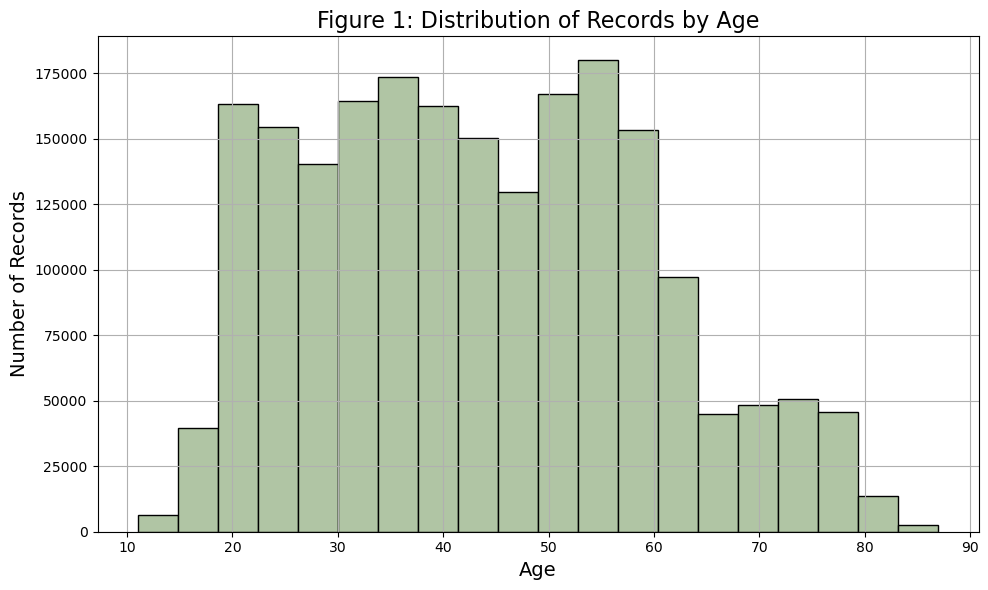

In [38]:
# Count and print the records in the "age" column
average_age_mean = df_merged['age'].mean()
print("Average Age:", average_age_mean)

# Plot the records distribution by age
plt.figure(figsize=(10, 6))
plt.hist(df_merged['age'], bins=20, color='#B0C5A4', edgecolor='black')
plt.title('Figure 1: Distribution of Records by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Average Salary: 381.7621442957279


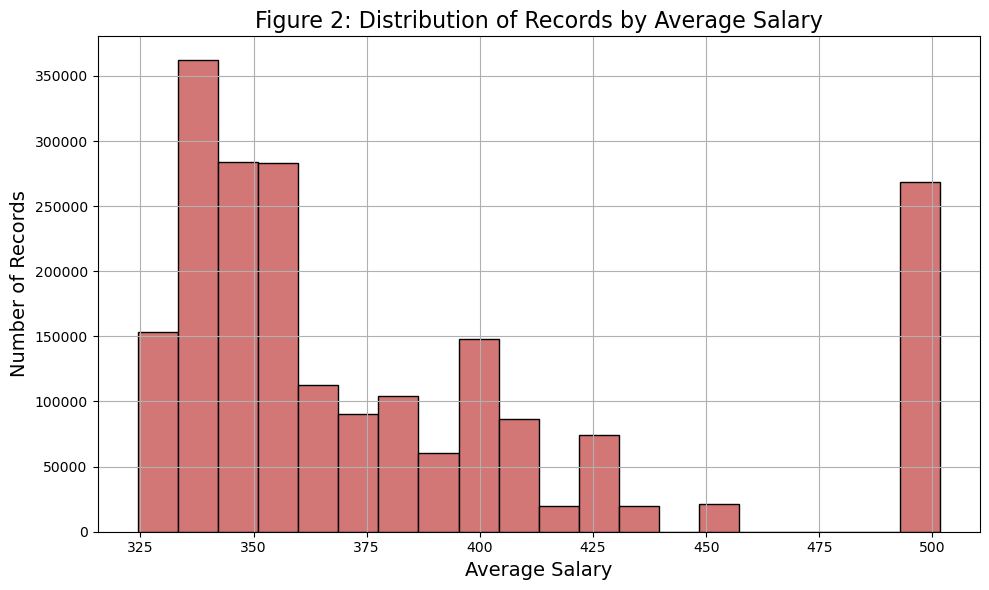

In [39]:
# Count and print the records in the "average_salary" column
average_salary_mean = df_merged['average_salary'].mean()
print("Average Salary:", average_salary_mean)

# Plot the records distribution by average salary
plt.figure(figsize=(10, 6))
plt.hist(df_merged['average_salary'], bins=20, color='#D37676', edgecolor='black')
plt.title('Figure 2: Distribution of Records by Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

trans_type
debit                 1343035
credit                 716004
withdrawal in cash      28826
Name: count, dtype: int64


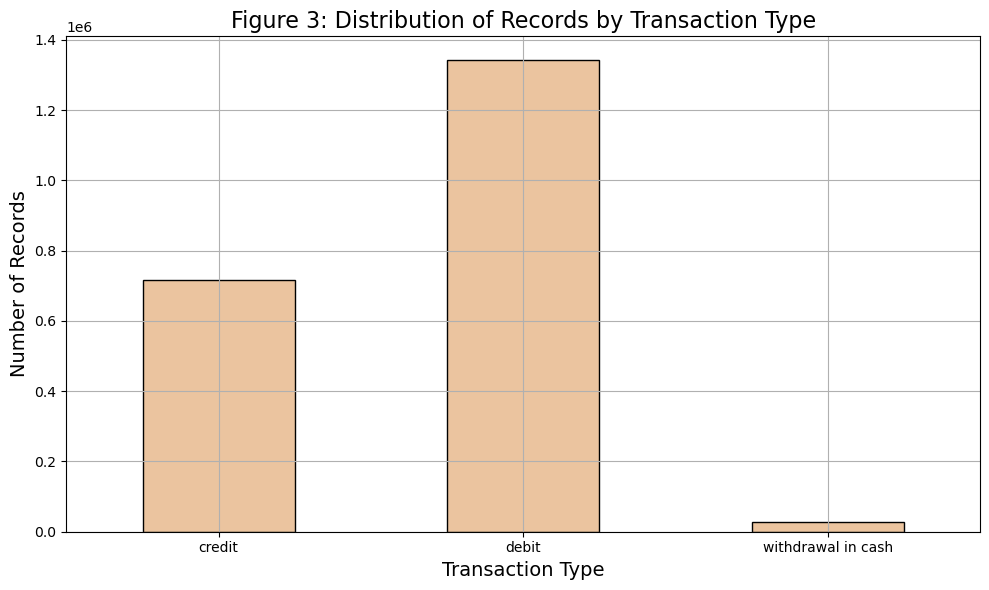

In [40]:
# Count and print the records in the "trans_type" column
trans_type_counts = df_merged['trans_type'].value_counts()
print(trans_type_counts)

# Plot the records distribution by transaction type
plt.figure(figsize=(10, 6))
df_merged['trans_type'].value_counts().sort_index().plot(kind='bar', color='#EBC49F', edgecolor='black')
plt.title('Figure 3: Distribution of Records by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

gender
male      1045670
female    1042195
Name: count, dtype: int64


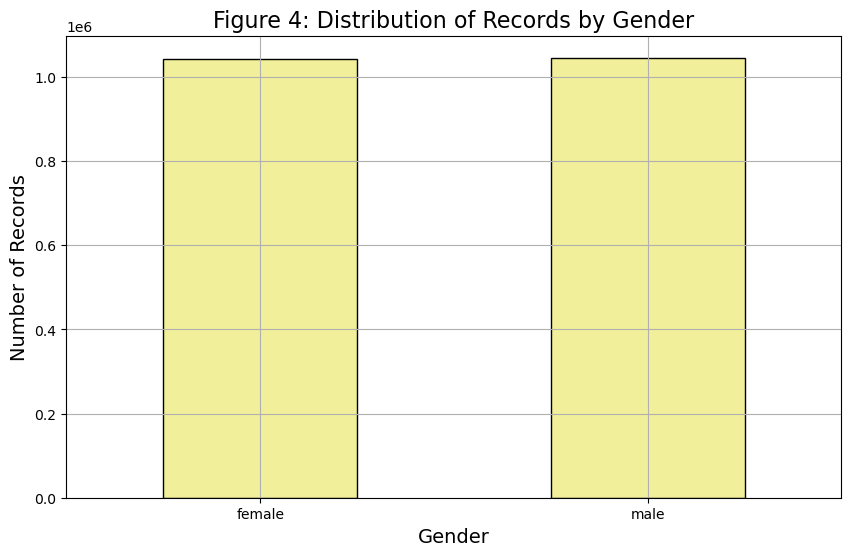

In [41]:
# Count and print the records in the "gender" column
gender_counts = df_merged['gender'].value_counts()
print(gender_counts)

# Plot the records distribution by gender
plt.figure(figsize=(10, 6))
df_merged['gender'].value_counts().sort_index().plot(kind='bar', color='#F1EF99', edgecolor='black')
plt.title('Figure 4: Distribution of Records by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

##### 5.2. Relationships between different features

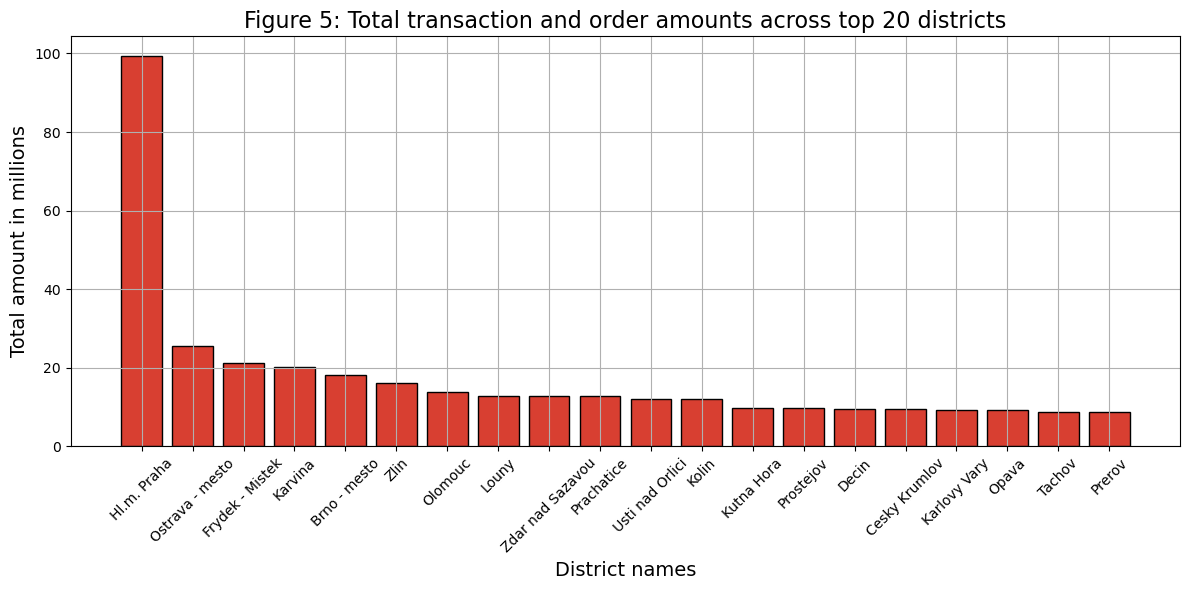

In [42]:
# Calculate the total transaction amount for each district in millions
district_totals = df_merged.groupby('district_name')[['trans_amount', 'order_amount']].sum() / 1_000_000  # Divide by 1 million for millions

# Calculate the total amount (trans_amount + order_amount) for each district
district_totals['total_amount'] = district_totals['trans_amount'] + district_totals['order_amount']

# Select top 20 districts
top20_districts = district_totals['total_amount'].nlargest(20).index

# Filter the dataset to only include the top 20 districts
df_top20 = df_merged[df_merged['district_name'].isin(top20_districts)]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.xlabel('District names', fontsize=14)
plt.bar(top20_districts, district_totals.loc[top20_districts, 'total_amount'], color='#D83F31', edgecolor='black')
plt.ylabel('Total amount in millions', fontsize=14)
plt.title('Figure 5: Total transaction and order amounts across top 20 districts', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

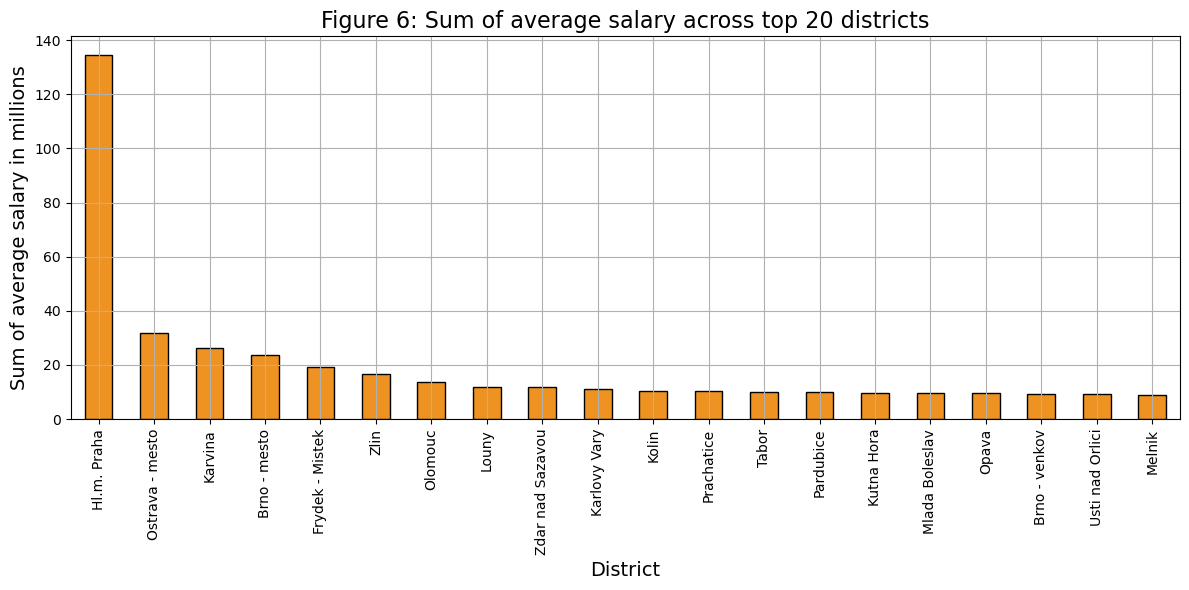

In [43]:
# Calculate the total average salary for each district in millions
average_salary_totals = df_merged.groupby('district_name')['average_salary'].sum() / 1_000_000

# Select top 20 districts
top20_districts = average_salary_totals.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
top20_districts.plot(kind='bar', color='#EE9322', edgecolor='black')
plt.xlabel('District', fontsize=14)
plt.ylabel('Sum of average salary in millions', fontsize=14)
plt.title('Figure 6: Sum of average salary across top 20 districts', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

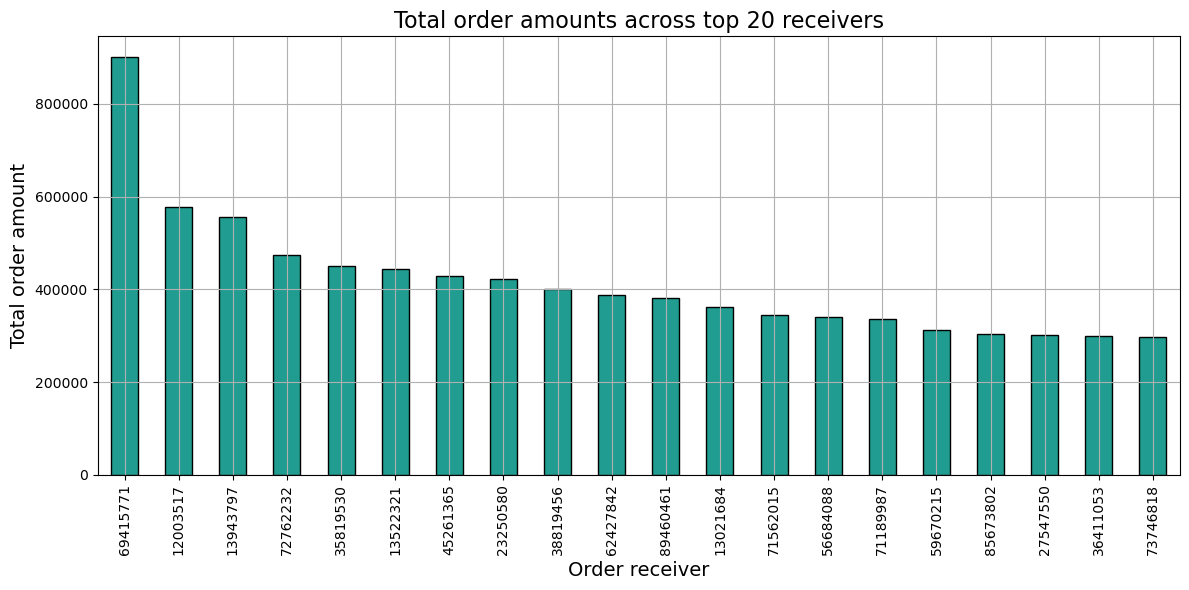

In [44]:
# Calculate the total order amount for each receiver
receiver_totals = df_merged.groupby('order_receiver')['order_amount'].sum()

# Select top 20 receivers
top20_receivers = receiver_totals.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
top20_receivers.plot(kind='bar', color='#219C90', edgecolor='black')
plt.xlabel('Order receiver', fontsize=14)
plt.ylabel('Total order amount', fontsize=14)
plt.title('Total order amounts across top 20 receivers', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

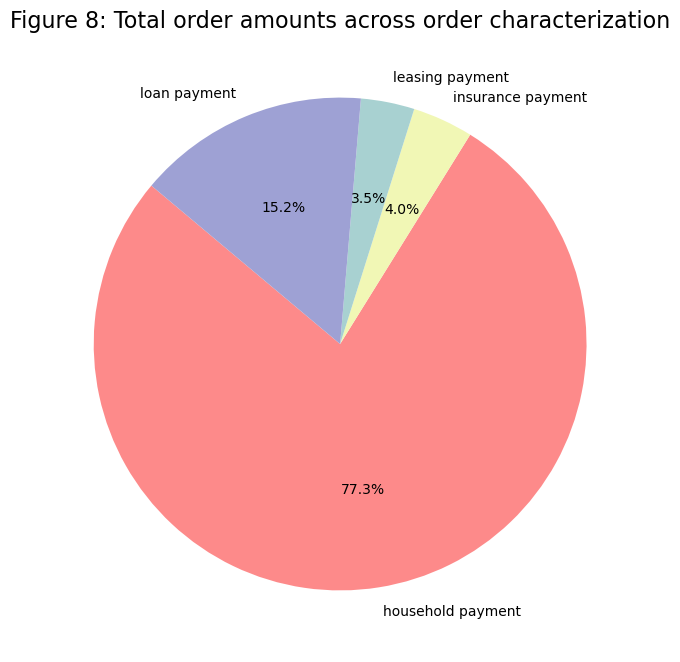

In [45]:
# Calculate the total order amount for each order characterization in millions
order_char_totals = df_merged.groupby('order_char')['order_amount'].sum() / 1_000_000
palette = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4']

# Create a pie chart
plt.figure(figsize=(8, 8))
order_char_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=palette)
plt.ylabel('')  # Remove the y-axis label
plt.title('Figure 8: Total order amounts across order characterization', fontsize=16)
plt.show()

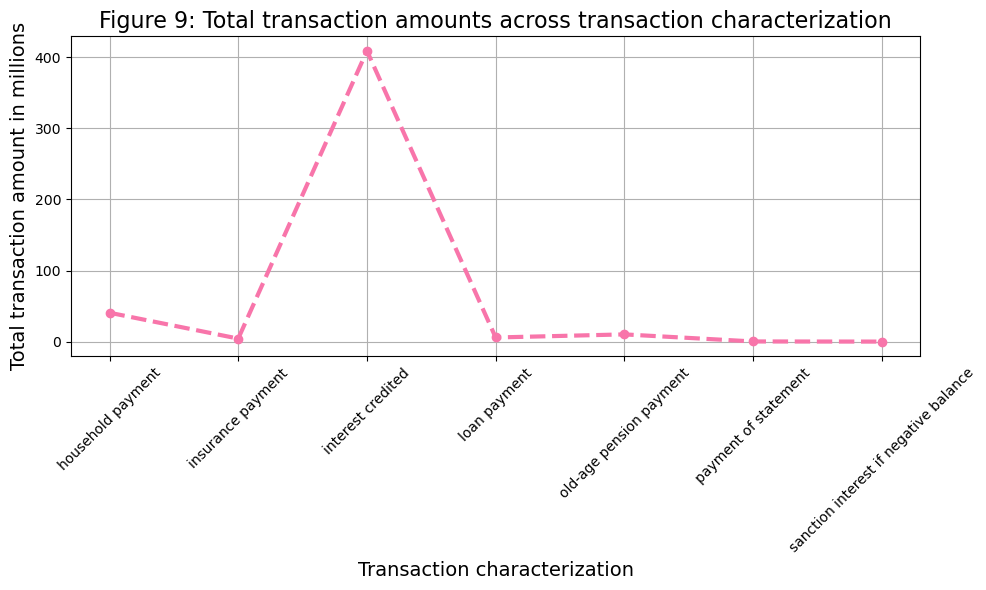

In [46]:
# Create a line plot
plt.figure(figsize=(10, 6))
trans_char_totals = df_merged.groupby('trans_char')['trans_amount'].sum() / 1_000_000
trans_char_totals.plot(kind='line', marker='o', color='#F875AA', linestyle='--', linewidth=3)
plt.xlabel('Transaction characterization', fontsize=14)
plt.ylabel('Total transaction amount in millions', fontsize=14)
plt.title('Figure 9: Total transaction amounts across transaction characterization', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()

C:\Users\caroline.teixeira\AppData\Local\Temp\ipykernel_34000\2864048975.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_merged.groupby(['spending_range', 'trans_type']).size().unstack(fill_value=0) / 1000  # Convert to thousands


<Figure size 1000x600 with 0 Axes>

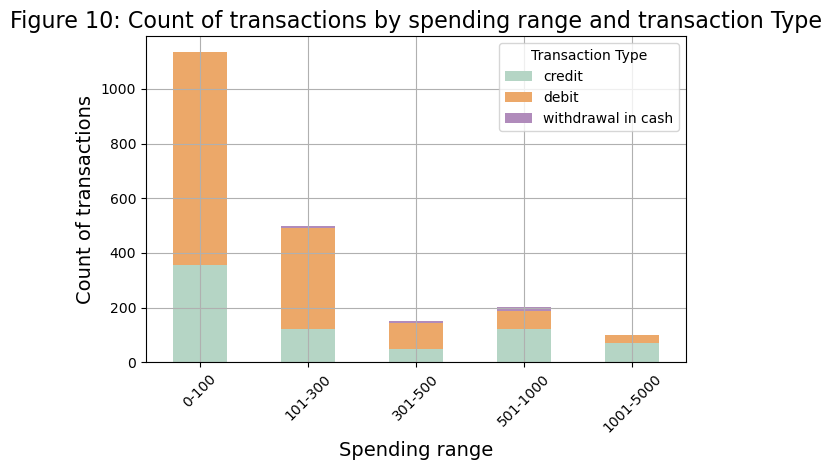

In [47]:
# Define spending ranges
spending_ranges = [0, 100, 300, 500, 1000, 5000]
spending_labels = ['0-100', '101-300', '301-500', '501-1000', '1001-5000']
palette = ['#B5D5C5', '#ECA869', '#B08BBB']

# Assign a spending range to each transaction
df_merged['spending_range'] = pd.cut(df_merged['trans_amount'], bins=spending_ranges, labels=spending_labels)

# Create a bar plot
plt.figure(figsize=(10, 6))
df_plot = df_merged.groupby(['spending_range', 'trans_type']).size().unstack(fill_value=0) / 1000  # Convert to thousands
df_plot.plot(kind='bar', stacked=True, color=palette)
plt.xlabel('Spending range', fontsize=14)
plt.ylabel('Count of transactions', fontsize=14)
plt.title('Figure 10: Count of transactions by spending range and transaction Type', fontsize=16)
plt.legend(title='Transaction Type', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 5.3. Inspect the categorical variables

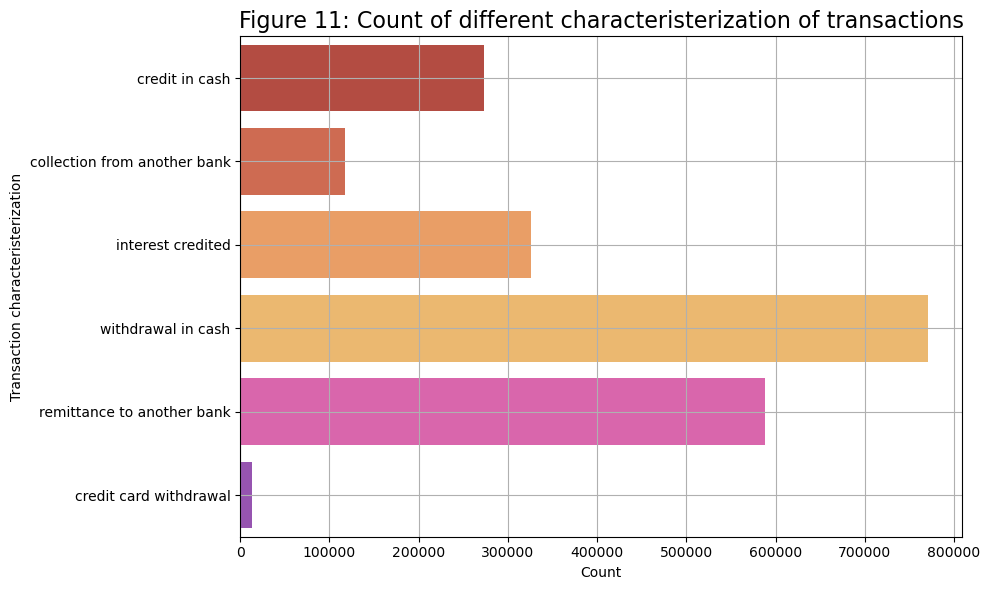

In [48]:
palette = ["#C63D2F", "#E25E3E", "#FF9B50", "#FFBB5C", "#EC53B0", "#9D44C0"]

# Create the count plot with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, y='trans_mode', palette=palette)
plt.title('Figure 11: Count of different characteristerization of transactions', fontsize=16)
plt.ylabel('Transaction characteristerization')
plt.xlabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

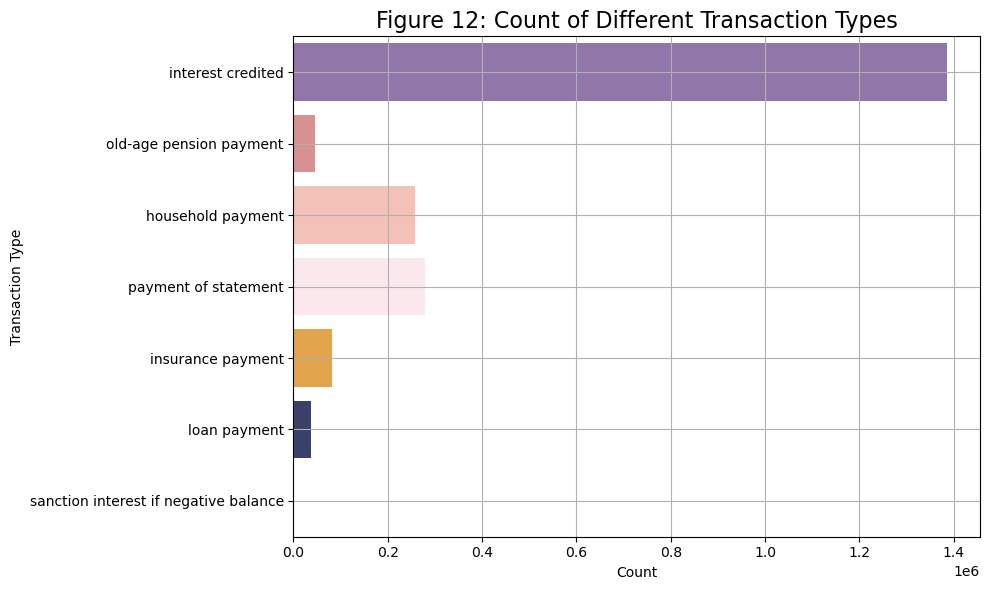

In [49]:
palette = ["#916DB3", "#E48586", "#FCBAAD", "#FDE5EC", "#FBA834", "#333A73", "#387ADF"]

# Create the count plot with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, y='trans_char', palette=palette)
plt.title('Figure 12: Count of Different Transaction Types', fontsize=16)
plt.ylabel('Transaction Type')
plt.xlabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Data Preparation

The gender, district_region, and district_name columns might not directly influence fraudulent transactions, so they will be dropped after the EDA.

In [50]:
df_merged.drop(columns=['trans_date'], inplace=True)
df_merged.drop(columns=['spending_range'], inplace=True)
df_merged.drop(columns=['gender'], inplace=True)
df_merged.drop(columns=['district_region'], inplace=True)
df_merged.drop(columns=['district_name'], inplace=True)

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087865 entries, 0 to 2087864
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   account_id      int64  
 1   age             int64  
 2   order_amount    float64
 3   order_receiver  int64  
 4   order_char      object 
 5   trans_type      object 
 6   trans_mode      object 
 7   trans_amount    float64
 8   trans_char      object 
 9   trans_receiver  float64
 10  average_salary  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 175.2+ MB


##### 6.1. MinMaxScaler

I have utilized the MinMaxScaler to normalize all the numeric features, ensuring that they are on a relatively similar scale. This is achieved by subtracting the minimum value from each feature and then dividing it by the range, which is the difference between the maximum and minimum values. MinMaxScaler will preserve the shape of the original distribution while ensuring that all features are balanced. This helps prevent the creation of bias when training our dataset.

In [52]:
numerical_columns = ['account_id', 'age', 'order_amount', 'order_receiver',
                     'trans_amount', 'trans_receiver', 'average_salary']

min_max_scaler = MinMaxScaler()

df_merged[numerical_columns] = min_max_scaler.fit_transform(df_merged[numerical_columns])

In [53]:
# Split the transaction date into different columns for day, month and year
# df_merged.loc[:, 'trans_day'] = df_merged['trans_date'].dt.day
# df_merged.loc[:, 'trans_month'] = df_merged['trans_date'].dt.month
# df_merged.loc[:, 'trans_year'] = df_merged['trans_date'].dt.year

##### 6.2. One-Hot Encoding

One-Hot Encoding will be used to transform each categorical column into sub-columns containing binary data (numeric). If the trans_type value is equal to credit, for example, the trans_type_credit column will contain the value 1 (true). If the trans_type is equal to another category, the trans_type_credit column will contain the value 0 (false). This approach is also implemented for all the other features, ensuring that only one of the sub-columns will contain the value 1.

In [54]:
df_encoded = pd.get_dummies(df_merged, columns=['order_char', 'trans_type', 'trans_mode', 'trans_char']).astype(int)
df_encoded.head()

,account_id,age,order_amount,order_receiver,trans_amount,trans_receiver,average_salary,order_char_household payment,order_char_insurance payment,order_char_leasing payment,...,trans_mode_interest credited,trans_mode_remittance to another bank,trans_mode_withdrawal in cash,trans_char_household payment,trans_char_insurance payment,trans_char_interest credited,trans_char_loan payment,trans_char_old-age pension payment,trans_char_payment of statement,trans_char_sanction interest if negative balance
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [55]:
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

In [56]:
df_encoded.columns

Index(['account_id', 'age', 'order_amount', 'order_receiver', 'trans_amount',
       'trans_receiver', 'average_salary', 'order_char_household_payment',
       'order_char_insurance_payment', 'order_char_leasing_payment',
       'order_char_loan_payment', 'trans_type_credit', 'trans_type_debit',
       'trans_type_withdrawal_in_cash',
       'trans_mode_collection_from_another_bank',
       'trans_mode_credit_card_withdrawal', 'trans_mode_credit_in_cash',
       'trans_mode_interest_credited', 'trans_mode_remittance_to_another_bank',
       'trans_mode_withdrawal_in_cash', 'trans_char_household_payment',
       'trans_char_insurance_payment', 'trans_char_interest_credited',
       'trans_char_loan_payment', 'trans_char_old-age_pension_payment',
       'trans_char_payment_of_statement',
       'trans_char_sanction_interest_if_negative_balance'],
      dtype='object')

# 7. Models

For one of the main parts of the project, we will use the Isolation Forest, Random Forest Regressor and Gradient Boosting models to detect fraudulent transactions. We need a threshold for creating the fraud column, which will indicate if the transaction is fraudulent or not. This can be done by calculating the mean and standard deviation of trans_amount (which will be defined as the target variable), and then we will define the threshold value as a multiple of 5 standard deviations away from the mean.

In [57]:
mean_trans_amount = df_encoded['trans_amount'].mean()
std_trans_amount = df_encoded['trans_amount'].std()

threshold = mean_trans_amount + 5 * std_trans_amount

print(threshold)

0.003460819151598047


Now we will drop the trans_amount column to create a X dataset with all the remaining columns and assign the trans_amount column to the y variable. After that, both the X and y datasets will be split into training and testing subsets. The test size will be the default 0.25, and the random state will be set to 0.

In [58]:
X = df_encoded.drop('trans_amount', axis=1)

X.head(10)

,account_id,age,order_amount,order_receiver,trans_receiver,average_salary,order_char_household_payment,order_char_insurance_payment,order_char_leasing_payment,order_char_loan_payment,...,trans_mode_interest_credited,trans_mode_remittance_to_another_bank,trans_mode_withdrawal_in_cash,trans_char_household_payment,trans_char_insurance_payment,trans_char_interest_credited,trans_char_loan_payment,trans_char_old-age_pension_payment,trans_char_payment_of_statement,trans_char_sanction_interest_if_negative_balance
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [59]:
y = df_encoded['trans_amount']

y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: trans_amount, dtype: int32

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##### 7.1. Isolation Forest, Random Forest Regressor and Gradient Boosting

- The "ifm" will be an instance of the Isolation Forest
- The "rfm" will be an instance of the Random Forest Regressor
- The "gbm" will be an instance of the Gradient Boosting
 
Each model will have a random state of 0. After that, we will fit the models, calculate the predictions and the mean squared error.

In [61]:
ifm = IsolationForest(random_state=0)
rfm = RandomForestRegressor(random_state=0)
gbm = GradientBoostingRegressor(random_state=0)

In [62]:
ifm.fit(X_train, y_train)
rfm.fit(X_train, y_train)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [63]:
y_pred_ifm = ifm.predict(X_test)
y_pred_rfm = rfm.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [64]:
mse_ifm = mean_squared_error(y_test, y_pred_ifm)
mse_rfm = mean_squared_error(y_test, y_pred_rfm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

In [65]:
print("Mean Squared Error (Isolation Forest):", mse_ifm)
print("Mean Squared Error (Random Forest):", mse_rfm)
print("Mean Squared Error (Gradient Boosting):", mse_gbm)

Mean Squared Error (Isolation Forest): 1.0
Mean Squared Error (Random Forest): 2.5801062222440946e-12
Mean Squared Error (Gradient Boosting): 2.5008919288513975e-12


##### 7.2. Hyperparameter Tuning

Hyperparameters are used to configure a set of variables before the training process starts, tuning the performance of the model and impacting the results significantly when correctly applied. The hyperparameter technique used below is the GridSearchCV, which fits the models using all possible combinations from the grid of values. In summary, it searches for the best set of hyperparameters from a grid of predefined values, and we can use the results to identify the best of them.

The following code defines the parameter for all three algorithms.

In [66]:
'''
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
'''

'\nimport warnings\nwarnings.filterwarnings("ignore", message="X does not have valid feature names")\n'

In [67]:
'''
# Isolation Forest
ifm_params = {
    'n_estimators': [100, 200, 300],
    'max_samples': ['auto', 100, 200],
    'contamination': [0.1, 0.05, 0.01]
}

# Random Forest Regressor
rfm_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
gbm_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
'''

"\n# Isolation Forest\nifm_params = {\n    'n_estimators': [100, 200, 300],\n    'max_samples': ['auto', 100, 200],\n    'contamination': [0.1, 0.05, 0.01]\n}\n\n# Random Forest Regressor\nrfm_params = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\n# Gradient Boosting\ngbm_params = {\n    'n_estimators': [50, 100, 200],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 5, 7],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n"

Now we will perform the grid search cross-validation.

In [68]:
'''
# Isolation Forest
ifm_grid_search = GridSearchCV(estimator=IsolationForest(random_state=0),
                                            param_grid=ifm_params,
                                            scoring='neg_mean_squared_error',
                                            cv=5)
ifm_grid_search.fit(X_train, y_train)

# Random Forest Regressor
rfm_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                                         param_grid=rfm_params,
                                         scoring='neg_mean_squared_error',
                                         cv=5)
rfm_grid_search.fit(X_train, y_train)

# Gradient Boosting
gbm_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                                             param_grid=gbm_params,
                                             scoring='neg_mean_squared_error',
                                             cv=5)
gbm_grid_search.fit(X_train, y_train)
'''

"\n# Isolation Forest\nifm_grid_search = GridSearchCV(estimator=IsolationForest(random_state=0),\n                                            param_grid=ifm_params,\n                                            scoring='neg_mean_squared_error',\n                                            cv=5)\nifm_grid_search.fit(X_train, y_train)\n\n# Random Forest Regressor\nrfm_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),\n                                         param_grid=rfm_params,\n                                         scoring='neg_mean_squared_error',\n                                         cv=5)\nrfm_grid_search.fit(X_train, y_train)\n\n# Gradient Boosting\ngbm_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),\n                                             param_grid=gbm_params,\n                                             scoring='neg_mean_squared_error',\n                                             cv=5)\ngbm_grid_search.fi

The following block of code calculates and prints the best parameters for each model.

In [69]:
'''
best_params_ifm = ifm_grid_search.best_params_
best_params_rfm = rfm_grid_search.best_params_
best_params_gbm = gbm_grid_search.best_params_

print("Best hyperparameters for Isolation Forest:", best_params_ifm)
print("Best hyperparameters for Random Forest:", best_params_rfm)
print("Best hyperparameters for Gradient Boosting:", best_params_gbm)
'''

'\nbest_params_ifm = ifm_grid_search.best_params_\nbest_params_rfm = rfm_grid_search.best_params_\nbest_params_gbm = gbm_grid_search.best_params_\n\nprint("Best hyperparameters for Isolation Forest:", best_params_ifm)\nprint("Best hyperparameters for Random Forest:", best_params_rfm)\nprint("Best hyperparameters for Gradient Boosting:", best_params_gbm)\n'

This will reinitialize the models with the best hyperparameters, keeping a random state of 0. After that, we will refit the models, calculate the predictions and the mean squared error for all of them.

In [71]:
'''
best_ifm = IsolationForest(**best_params_ifm, random_state=0)
best_rfm = RandomForestRegressor(**best_params_rfm, random_state=0)
best_gbm_model = GradientBoostingRegressor(**best_params_gbm, random_state=0)
'''

'\nbest_ifm = IsolationForest(**best_params_ifm, random_state=0)\nbest_rfm = RandomForestRegressor(**best_params_rfm, random_state=0)\nbest_gbm_model = GradientBoostingRegressor(**best_params_gbm, random_state=0)\n'

In [72]:
'''
best_ifm.fit(X_train, y_train)
best_rfm.fit(X_train, y_train)
best_gbm.fit(X_train, y_train)
'''

'\nbest_ifm.fit(X_train, y_train)\nbest_rfm.fit(X_train, y_train)\nbest_gbm.fit(X_train, y_train)\n'

In [73]:
'''
y_pred_ifm_tuned = best_ifm.predict(X_test)
y_pred_rfm_tuned = best_rfm.predict(X_test)
y_pred_gbm_tuned = best_gbm.predict(X_test)
'''

'\ny_pred_ifm_tuned = best_ifm.predict(X_test)\ny_pred_rfm_tuned = best_rfm.predict(X_test)\ny_pred_gbm_tuned = best_gbm.predict(X_test)\n'

In [74]:
'''
mse_ifm_tuned = mean_squared_error(y_test, y_pred_isolation_forest_tuned)
mse_rfm_tuned = mean_squared_error(y_test, y_pred_rfm_tuned)
mse_gbm_tuned = mean_squared_error(y_test, y_pred_gbm_tuned)
'''

'\nmse_ifm_tuned = mean_squared_error(y_test, y_pred_isolation_forest_tuned)\nmse_rfm_tuned = mean_squared_error(y_test, y_pred_rfm_tuned)\nmse_gbm_tuned = mean_squared_error(y_test, y_pred_gbm_tuned)\n'

In [75]:
'''
print("Tuned Mean Squared Error (Isolation Forest):", mse_ifm_tuned)
print("Tuned Mean Squared Error (Random Forest):", mse_rfm_tuned)
print("Tuned Mean Squared Error (Gradient Boosting):", mse_gbm_tuned)
'''

'\nprint("Tuned Mean Squared Error (Isolation Forest):", mse_ifm_tuned)\nprint("Tuned Mean Squared Error (Random Forest):", mse_rfm_tuned)\nprint("Tuned Mean Squared Error (Gradient Boosting):", mse_gbm_tuned)\n'

##### 7.4. Fraud Column

By using the threshold value that was defined at the beginning of this section, we will create the fraud column and assign binary labels to it based on predictions exceeding the threshold value. The steps are:

- Create one fraud column for each model
- Create a single fraud column that will combine the results from the three models and define that if the sum of the predictions is greater than 0, the transaction is classified as fraudulent; otherwise, it is classified as non-fraudulent
- Convert the values from boolean to integer
- Drop the first three columns


In [76]:
df_encoded['fraud_ifm'] = (ifm.predict(X) < threshold).astype(int)
df_encoded['fraud_rfm'] = (rfm.predict(X) < threshold).astype(int)
df_encoded['fraud_gbm'] = (gbm.predict(X) < threshold).astype(int)

In [77]:
df_encoded['fraud'] = (df_encoded['fraud_ifm'] + df_encoded['fraud_rfm'] + df_encoded['fraud_gbm']) >= 2

In [78]:
df_encoded['fraud'] = df_encoded['fraud'].astype(int)

In [79]:
df_encoded.drop(['fraud_ifm', 'fraud_rfm', 'fraud_gbm'], axis=1, inplace=True)

In [80]:
df_encoded['fraud'].unique()

array([1])

In [81]:
frauds = df_encoded['fraud'].value_counts()
frauds

fraud
1    2087865
Name: count, dtype: int64

In [82]:
total_frauds = df_encoded['fraud'].sum()
total_cases = len(df_encoded.index)
ratio = total_frauds / total_cases

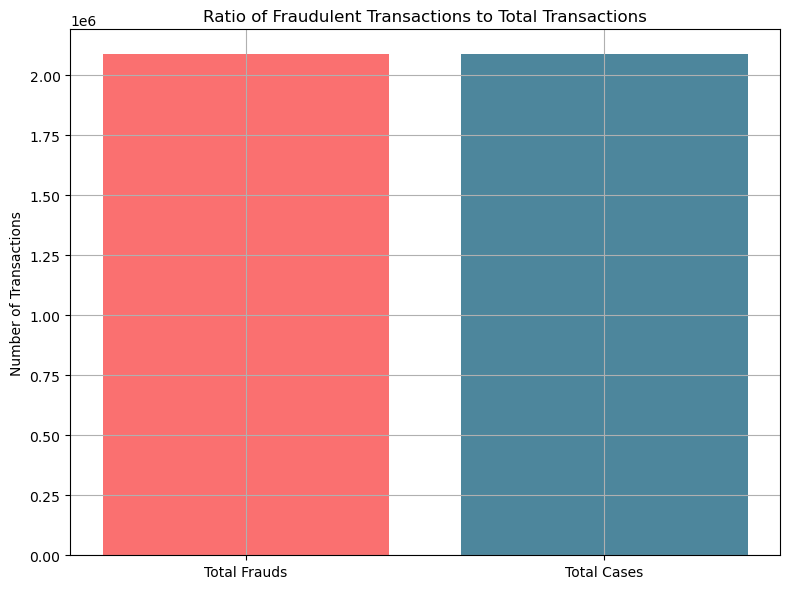

Ratio of fraudulent transactions to total transactions: 1.0


In [83]:
plt.figure(figsize=(8, 6))
plt.bar(['Total Frauds', 'Total Cases'], [total_frauds, total_cases], color=['#FA7070', '#4D869C'])
plt.title('Ratio of Fraudulent Transactions to Total Transactions')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Ratio of fraudulent transactions to total transactions:", ratio)